# 1. Business Problem
## 1.1 Problem Context

Our client is a large Real Estate Investment Trust (REIT).
* They invest in houses, apartments, and condos(complex of buildings) within a small county in New York state.
* As part of their business, they try to predict the fair transaction price of a property before it's sold.
* They do so to calibrate their internal pricing models and keep a pulse on the market.

## 1.2 Problem Statement
The REIT has hired us to find a data-driven approach to valuing properties.
* They currently have an untapped dataset of transaction prices for previous properties on the market.
* The data was collected in 2016.
* Our task is to build a real-estate pricing model using that dataset.
* If we can build a model to predict transaction prices with an average error of under US Dollars 70,000, then our client will be very satisfied with the our resultant model.

## 1.3 Business Objectives and Constraints
* Deliverable: Trained model file
* Win condition: Avg. prediction error < \$70,000
* Model Interpretability will be useful
* No latency requirement

# 2. Machine Learning Problem
## 2.1 Data Overview

For this project:
1. The dataset has 1883 observations in the county where the REIT operates.
2. Each observation is for the transaction of one property only.
3. Each transaction was between \$200,000 and \$800,000.

#### Target Variable
* 'tx_price' - Transaction price in USD

#### Features of the data:

Public records:
* 'tx_year' - Year the transaction took place
* 'property_tax' - Monthly property tax
* 'insurance' - Cost of monthly homeowner's insurance

Property characteristics:
* 'beds' - Number of bedrooms
* 'baths' - Number of bathrooms
* 'sqft' - Total floor area in squared feet
* 'lot_size' - Total outside area in squared feet
* 'year_built' - Year property was built
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
* 'basement' - Does the property have a basement?
* 'exterior_walls' - The material used for constructing walls of the house
* 'roof' - The material used for constructing the roof

Location convenience scores:
* 'restaurants' - Number of restaurants within 1 mile
* 'groceries' - Number of grocery stores within 1 mile
* 'nightlife' - Number of nightlife venues within 1 mile
* 'cafes' - Number of cafes within 1 mile
* 'shopping' - Number of stores within 1 mile
* 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
* 'beauty_spas' - Number of beauty and spa locations within 1 mile
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

Neighborhood demographics:
* 'median_age' - Median age of the neighborhood
* 'married' - Percent of neighborhood who are married
* 'college_grad' - Percent of neighborhood who graduated college

Schools:
* 'num_schools' - Number of public schools within district
* 'median_school' - Median score of the public schools within district, on the range 1 - 10

## 2.2 Mapping business problem to ML problem
### 2.2.1 Type of Machine Learning Problem
It is a regression problem, where given the above set of features, we need to predict the transaction price of the house.

### 2.2.2 Performance Metric (KPI)
**Since it is a regression problem, we will use the following regression metrics:**
#### 2.2.2.1 Root Mean Squared Error (RMSE)

![title](Images/rmse.gif)

#### 2.2.2.2 R-squared
![title](Images/r_squared.png)

Just remember the value of R suared must be at least greater than 0 and 1 in the best case

## 2.3 Train-Test Splits
**80-20**

# 3. Exploratory Data Analysis

#### Import the libraries

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import classes for ML Models
from sklearn.linear_model import Ridge  ## Linear Regression + L2 regularization
from sklearn.linear_model import Lasso ##Linear Regression + L1 regularizatio
from sklearn.svm import SVR ## Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

## import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  ## to plot feature importance

# To save the final model on disk
from sklearn.externals import joblib  ## Reference http://scikit-learn.org/stable/modules/model_persistence.html

C:\Users\abc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
np.set_printoptions(precision=2, suppress=True)

## 3.1 Load real estate data from CSV

In [7]:
df = pd.read_csv('Files/real_estate_data.csv')

###### Display the dimensions of the dataset.

In [8]:
df.shape

(1883, 26)

###### Given features of  dataset.

In [9]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

##### Display the first 5 rows for observation

In [10]:
pd.set_option('display.max_columns', 100) ## display max 100 columns
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


Some feaures are numeric and some are categorical

###### Filtering the categorical features:

In [11]:
df.dtypes[df.dtypes=='object']

property_type     object
exterior_walls    object
roof              object
dtype: object

## 3.2 Distribution of Numeric Features

One of the most enlightening data exploration tasks is plotting the distributions of your features

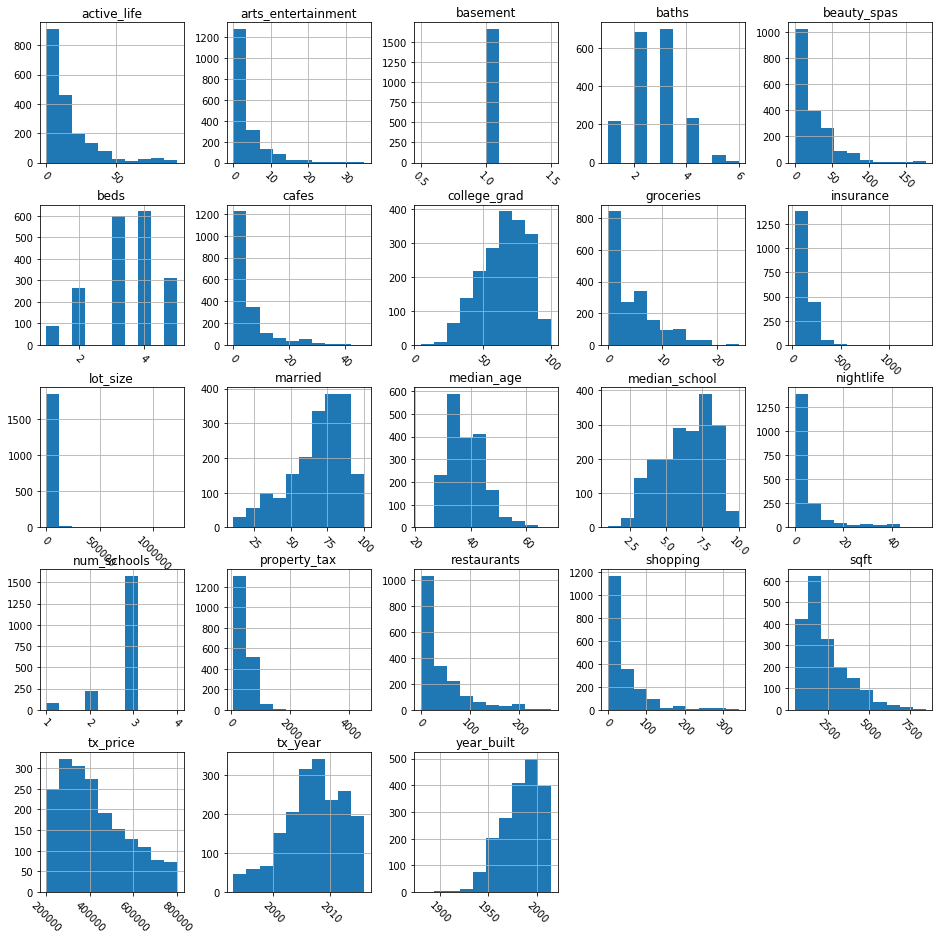

In [12]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

**Observations:**
We can make out quite a few observations:

For example, consider the histogram for beds:
* Over 600 houses have 4 bedrooms, and similar number of houses have 3 bedrooms.
* Less than 100 houses have one bedroom and so on.

For example, consider the histogram for sqft:
* Over 600 house having sqft less then 2500.
* Over 200 having the sqft less 5000 & few no of house having sqft greater then 7500.


Also, look at the plot for the 'year_built' feature:
* The last bin in the histogram represents the range 2010-2020.
* Since this dataset was pulled in 2016, we should not have properties built in 2019.
* A property built after 2016 would be a measurement error.
* However, because of the 10-year bins, it's hard to tell if there's a measurement error just from the plot above.

##### Display summary statistics for numeric features

In [13]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


**Obeservation:**
* Look at the 'year_built' column, we can see that its max value is 2015.
* The 'basement' feature has some missing values, also its standard deviation is 0.0, while its min and max are both 1.0. Maybe this is a feature that should be binary?
* Just note the mean values of all the parameters and get a sense whether the values look reasonable

## 3.3 Distributions of categorical features
Display summary statistics for categorical features.

In [14]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


**Obeservation:**
* exterior_walls and roof having some of the missing values.
* There are 16 unique classes for 'exterior_walls', and the most frequent one is 'Brick'.
    

###### Plot bar plot for the 'exterior_walls' feature.

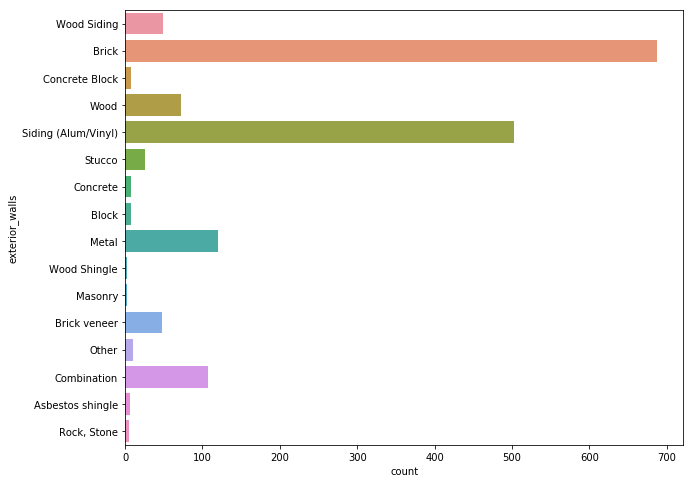

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(y='exterior_walls',data=df)

**Observations:**
Take a look at the frequencies of the classes.

Several classes are quite prevalent in the dataset. They have long bars. Those include:
* 'Brick'
* 'Siding (Alum/Vinyl)'
* 'Metal'
* 'Combination'

On the flipside, some classes have really short bars. For example:
* 'Concrete Block'
* 'Concrete'
* 'Block'
* 'Wood Shingle'
* etc...
* These don't have many observations, and they are called sparse classes.

## 3.4 Sparse Classes
Sparse classes are classes in categorical features that have a very small number of observations.

They tend to be problematic when we get to building models.
* In the best case, they don't influence the model much.
* In the worst case, they can cause the model to be overfit.

Let's make a mental note to combine or reassign some of these classes later.

#### Bar plot for each categorical feature

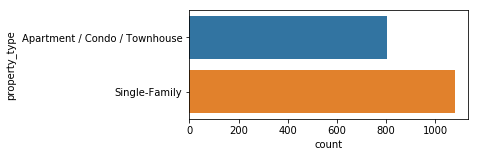

In [16]:
plt.figure(figsize=(5,2))
sns.countplot(y='property_type',data=df)

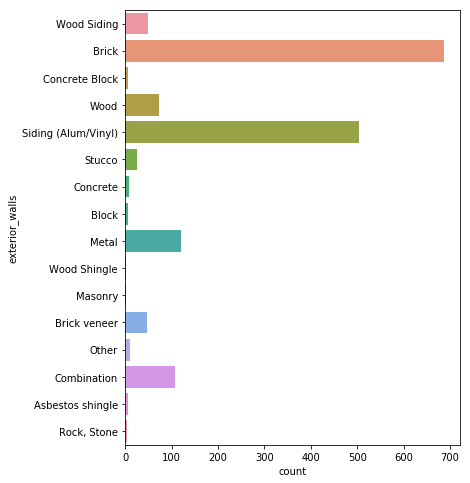

In [17]:
plt.figure(figsize=(6,8))
sns.countplot(y='exterior_walls', data=df)

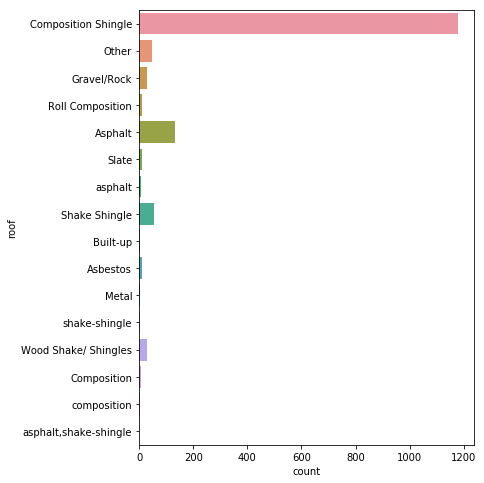

In [18]:
plt.figure(figsize=(6,8))
sns.countplot(y='roof', data=df)

**Observations:** In both 'exterior_walls' and 'roof' as well we have many sparse classes

## 3.5 Segmentations
Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

Segmenting the target variable by key categorical features.

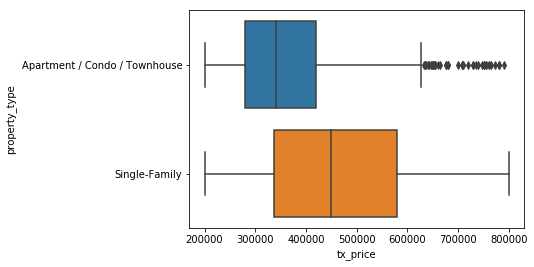

In [15]:
sns.boxplot(y='property_type',x='tx_price',data=df)

**Observation:** In general, it looks like single family homes are more expensive then the apartment/condo/Townhouse.

Let's compare the two property types across other features as well

In [16]:
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


Some questions to consider include:
* On average, which type of property is larger?
* Which type of property is has larger lots?
* Which type of property is in areas with more nightlife options/more restaurants/more grocery stores?
* Do these relationships make intuitive sense, or are any surprising to you?

Segment 'sqft' by 'property_type' and plot the boxplots

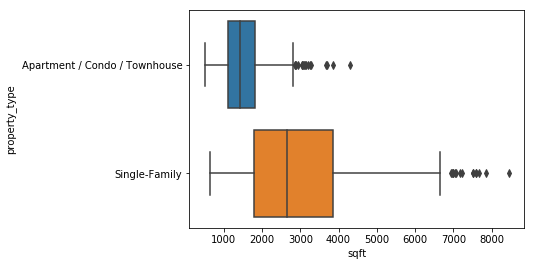

In [17]:
sns.boxplot(y='property_type',x='sqft',data=df)

After producing the plot, consider these questions:
* Which type of property is larger, on average?
* Which type of property sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

Segment by property_type and display the means and standard deviations within each class

In [18]:
df.groupby('property_type').agg([np.mean,np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

## 3.6 Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [19]:
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


#### A lot of numbers make things difficult to read. So let's visualize this.
But first, it's important to notice that the correlations for 'basement' all show as NaN. This is expected because right now that feature doesn't vary at all (its standard deviation is 0), as we saw all the way back in step 2. We'll fix this later.

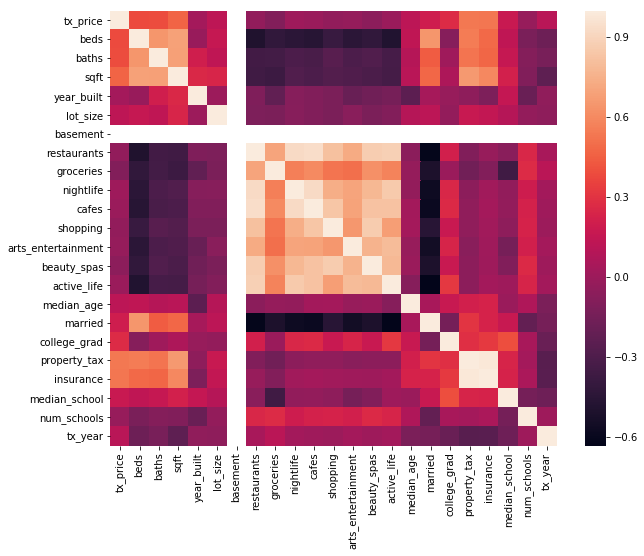

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

**What to look for?**
* The colorbar on the right explains the meaning of the heatmap - Dark colors indicate **strong negative correlations** and light colors indicate **strong positive correlations**.
* Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable by scanning the first column.
* In this case, it doesn't look like many features are strongly correlated with the target variable.
* There is a weak positive correlation between 'tx_price' and 'property_tax'.

**Just making the heatmap visualization more fancy**

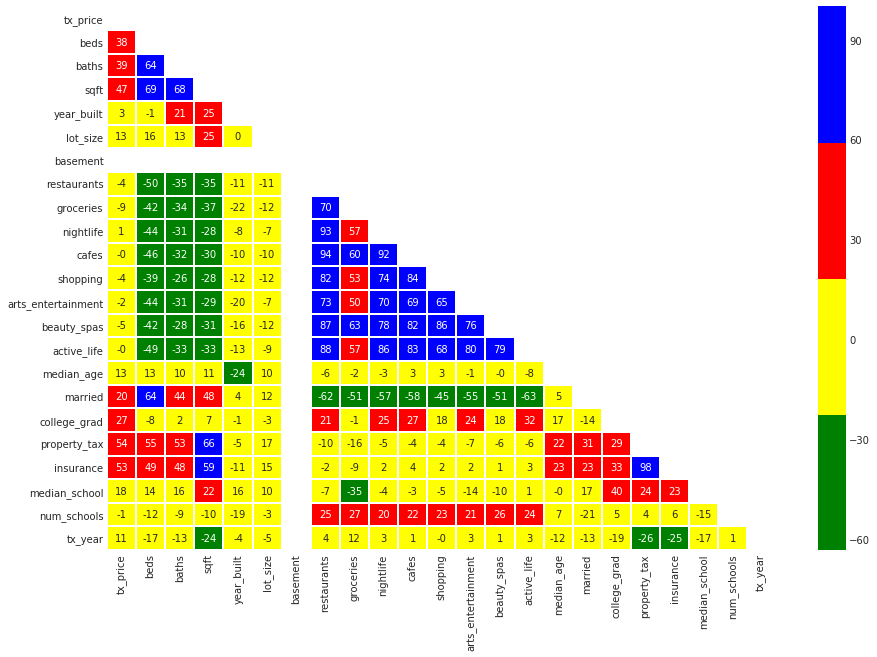

In [21]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))


# 4. Data Cleaning

## 4.1 Dropping the duplicates (De-duplication)
Duplicate observations most frequently arise during data collection, such as when you:
* Combine datasets from multiple places
* Scrape data
* Receive data from clients/other departments

In [19]:
df=df.drop_duplicates()
print(df.shape)

(1883, 26)


It looks like we didn't have any duplicates in our original dataset. Even so, it's a good idea to check this as an easy first step for cleaning your dataset.

## 4.2 Fix structural errors
* Recall, the basement features had some nan values

In [20]:
df.basement.unique()

array([ nan,   1.])

* Even though NaN represents "missing" values, those are actually meant to indicate properties without basements.
* Fill missing 'basement' values with the value 0 to turn 'basement' into a true indicator variable.

**Note** - Nan in basement doesn't means that value is missing, their Nan represent that praticular property donot having basement.

In [21]:
df.basement.fillna(0, inplace=True)

In [22]:
df.basement.unique()

array([ 0.,  1.])

## 4.3 Typos and capitalization

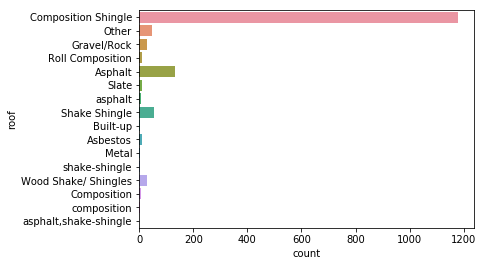

In [23]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)

Using this plot, we can easily catch typos and inconsistent capitalization. For example:
* 'composition' should be 'Composition'
* 'asphalt' should be 'Asphalt'
* 'shake-shingle' should be 'Shake Shingle'
* 'asphalt,shake-shingle' could probably just be 'Shake Shingle'

In [24]:
df.roof.replace('composition', 'Composition', inplace=True)
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

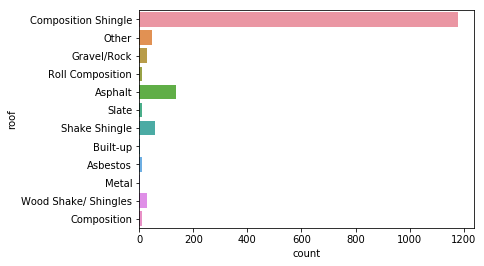

In [25]:
# Class distribution for 'roof' after the modifications
sns.countplot(y='roof', data=df)

## 4.4 Mislabeled classes
Finally, we'll check for classes that are labeled as separate classes when they should really be the same.
* e.g. If 'N/A' and 'Not Applicable' appear as two separate classes, we should combine them.
* For example, let's plot the class distributions for 'exterior_walls':

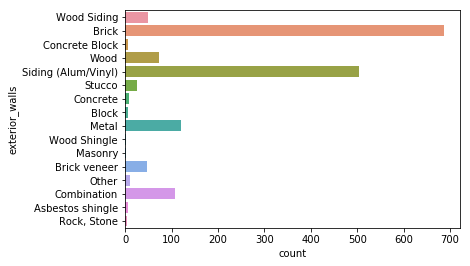

In [26]:
sns.countplot(y='exterior_walls', data=df)

Using that chart, we can easily catch mislabeled classes. For example
* 'Rock, Stone' should be 'Masonry'
* 'Concrete' and 'Block' should both just be 'Concrete Block'

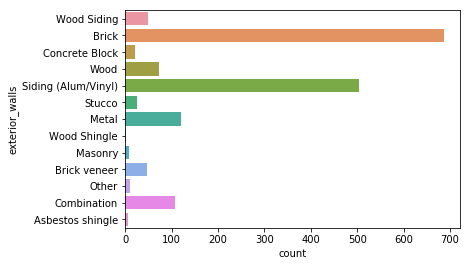

In [27]:
df.exterior_walls.replace(['Rock, Stone'], 'Masonry', inplace=True)
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)
sns.countplot(y='exterior_walls', data=df)

## 4.5 Removing Outliers
* Outliers can cause problems with certain types of models.
* Boxplots are a nice way to detect outliers
* Let's start with a box plot of your target variable, since that's what you're actually trying to predict.

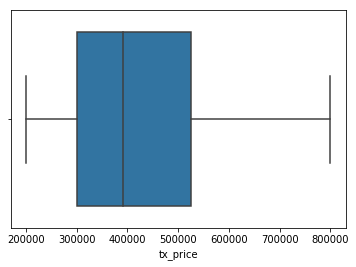

In [28]:
sns.boxplot(df.tx_price)

**Interpretation**

* The two vertical bars on the ends are the min and max values. All properties sold for between \$200,000 and \$800,000.
* The box in the middle is the interquartile range (25th percentile to 75th percentile).
* Half of all observations fall in that box.
* Finally, the vertical bar in the middle of the box is the median.

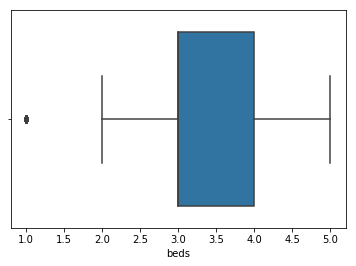

In [29]:
## Checking outliers in number of bedrooms
sns.boxplot(df.beds)

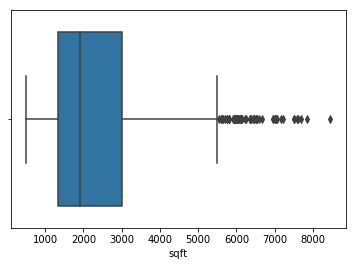

In [30]:
## Checking outliers in size of the house
sns.boxplot(df.sqft)

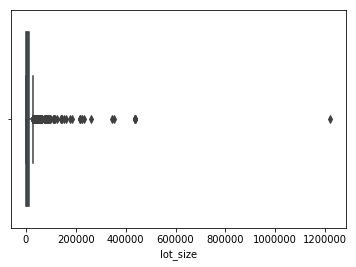

In [31]:
## Checking outliers in lot size
sns.boxplot(df.lot_size)

Look at the dot on the extreme right. This might indicate some erroneous point.

Let's look at the largest 5 lot sizes just to confirm.

In [32]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

In [33]:
## Remove observations with lot_size greater than 500,000 sqft.
df = df[df.lot_size <= 500000]
df.shape

(1882, 26)

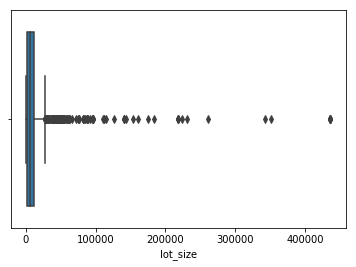

In [34]:
## Plotting the boxplot of lot size after the change
sns.boxplot(df.lot_size)

**Note:** Even though visually the plot looks the same but the x-axis dimensions have changed

## 4.6 Label missing categorical data
You cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that Scikit-Learn algorithms do not accept missing values.

In [35]:
# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

#### The best way to handle missing data for categorical features is to simply label them as 'Missing'!

In [36]:
df['exterior_walls'] = df['exterior_walls'].fillna('Missing')
df['roof'] = df['roof'].fillna('Missing')
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

## 4.7 Flag and fill missing numeric data

In [37]:
# Display number of missing values by numeric feature
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Well, it looks like we don't have any numerical features with missing values in this dataset.

### Before we move on to the next module, let's save the new dataframe we worked hard to clean.
This makes sure we don't have to re-do all the cleaning after clossing the session

In [38]:
# Save cleaned dataframe to new file
df.to_csv('Files/cleaned_df.csv', index=None)










# 5. Feature Engineering
* Feature engineering is the practice of creating new features from existing ones
* The engineered features are often more specific or isolate key information.
* Often, feature engineering is one of the most valuable tasks a data scientist can do to improve model effectiveness.

**Note:** There are limitless possibilities for Feature Engineering, and it's a skill that will naturally improve as you gain more experience and domain expertise.

## 5.1 Indicator variables

* For example, let's say you knew that homes with 2 bedrooms and 2 bathrooms are especially popular for investors.
* Maybe you suspect these types of properties command premium prices. (You don't need to know for sure.)
* Create an indicator variable to flag properties with 2 beds and 2 baths and name it 'two_and_two'.

In [39]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [40]:
# Display percent of rows where two_and_two == 1
df[df['two_and_two']==1].shape[0]/df.shape[0]

0.09458023379383634

The interpretation is that almost 9.5% of the observations in our dataset were for properties with 2 beds and 2 baths.

* There are some people which are inserted in 3 or 4 bed rooms Apartment, so lets try to figure it out 

In [41]:
df['3-4 bed'] = (df.beds >2).astype(int)

In [42]:
# Display percent of rows where 3-4 bed == 1
df[df['3-4 bed']==1].shape[0]/df.shape[0]

0.8113708820403825

The interpretation is that almost 81.1% of the observations in our dataset were for properties with 3 &4 beds.

* There are many people who are inserted in new_property as compared to older property, so let us try to figure out the older property as one of the feature.

In [43]:
df['older_property'] = (df.year_built < 1970).astype(int)

In [44]:
# Display percent of rows where older_property == 1
df[df['older_property']==1].shape[0]/df.shape[0]

0.24920297555791712

The interpretation is that almost 24.9% of the observations in our dataset were for properties which are older.

* 
Create a new feature containing tax and insurance which a propery holder will have to pay monthly

In [45]:
df['tax_and_insurance'] = df.property_tax + df.insurance

### Example: housing market recession
According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).
![title](Images/zillow-housing-prices.png)

Create a new feature called 'during_recession' to indicate if a transaction falls between 2010 and 2013

In [46]:
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

In [47]:
# Print percent of transactions where during_recession == 1
df[df['during_recession']==1].shape[0]/df.shape[0]

0.2635494155154091

## 5.2 Interaction features
* Interaction features are operations between two or more other features.
* In some contexts, "interaction terms" must be products of two variables.
* In our context, interaction features can be products, sums, or differences between two features.

* For example, in our dataset, we know the transaction year and the year the property was built in.
* However, the more useful piece of information that combining these two features provides is the age of the property at the time of the transaction.

In [48]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

**Note:** 'property_age' denotes the age of the property when it was sold and not how old it is today, since we want to predict the price at the time when the property is sold.

**Sanity Check:** It's always nice to do a quick sanity check after creating a feature, which could save you headaches down the road. For example, 'property_age' should never be less than 0, right?

In [49]:
print(df.property_age.min())

-8


Nice find. Something is definitely wrong. Age of property can never be negative.

In [50]:
# Number of observations with 'property_age' < 0
print(sum(df.property_age < 0))

19


* On second thought, it's possible that some home owners bought houses before the construction company built them.
* This is not uncommon, especially with single-family homes.
* However, for this problem, **we are only interested in houses that already exist** because the REIT only buys existing ones!

In [51]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]
df.shape

(1863, 32)

Now, let's add another interaction feature. How about the number of quality schools nearby?
* Well, we do know the number of schools nearby (<code style="color:steelblue">'num_schools'</code>) 
* We also have their median quality score (<code style="color:steelblue">'median_schools'</code>)
* But what if it's the **interaction** of those two factors that's really important? 
* In other words, what if it's good to have many school options, but only if they are good?

We can represent this with an interaction feature.

In [52]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

In [53]:
# Display median school score
df.school_score.median()

18.0

## 5.3 Handling Sparse Classes
* Sparse classes are those that have very few total observations.
* As mentioned earlier, they can be problematic for certain machine learning algorithms.
* At best, they are ignored.
* At worst, they can cause models to be overfit.

The easiest way to check for sparse classes is simply by plotting the distributions of your categorical features. We already did this during exploratory analysis, but since we've done some data cleaning since then, let's plot them again.

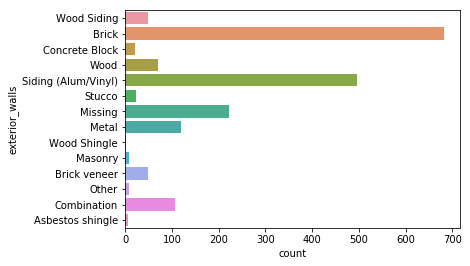

In [54]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

Group 'Wood Siding', 'Wood Shingle', and 'Wood' together. Label all of them as 'Wood'.

In [55]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle', 'Wood'], 'Wood', inplace=True)

Next, we can group the remaining sparse classes into a single 'Other' class, even though there's already an 'Other' class.
Let's label 'Stucco', 'Other', 'Asbestos shingle', 'Concrete Block', and 'Masonry' as 'Other

In [56]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

Finally, now that we've grouped together sparse classes, let's look at the bar plot for exterior walls again.

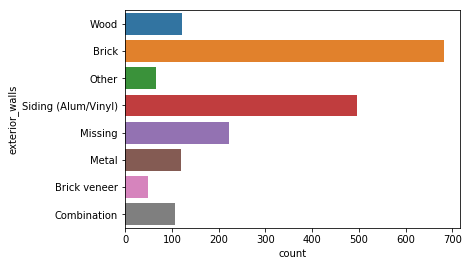

In [57]:
sns.countplot(y='exterior_walls', data=df)

Similarly we check for 'roof'

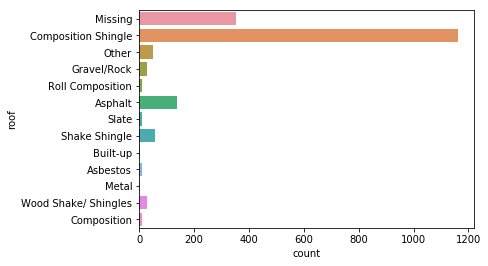

In [58]:
sns.countplot(y='roof', data=df)

Group 'Composition' and 'Wood Shake/ Shingles' into the 'Composition Shingle' class.

In [59]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

Next, let's group remaining sparse classes into a single 'Other' class.

Label 'Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', and 'Metal' as 'Other'.

In [60]:
other_roof = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df.roof.replace(other_roof, 'Other', inplace=True)

Finally, display bar plot again.

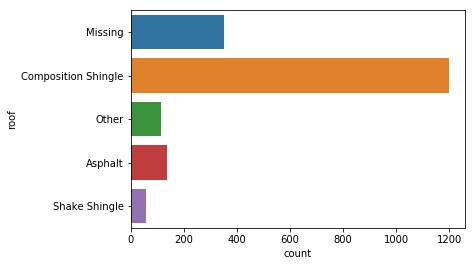

In [61]:
sns.countplot(y='roof', data=df)

**Now these plots look much nicer**

## 5.4 Encode dummy variables (One Hot Encoding)
* Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
* Therefore, we need to create dummy variables for our categorical features.
* *Dummy variables* are a set of binary (0 or 1) features that each represent a single class from a categorical feature.

The information you represent is exactly the same, but this numeric representation allows you to pass Scikit-Learn's technical requirement.

In [62]:
# Create a new dataframe with dummy variables for for our categorical features.
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

**Note:** There are many ways to perform one-hot encoding, you can also use LabelEncoder and OneHotEncoder classes in SKLEARN or use the above pandas function.

Let's display the first 5 rows again to see these new features<br>
Click the table and scroll over to the right.<br>
Check dummy variables created for 'exterior_walls', 'roof' and 'property_type'

In [63]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,3-4 bed,older_property,tax_and_insurance,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,0,0,315.0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,1,220.0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,0,1,290.0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,0,357.0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,0,118.0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## 5.5 Remove unused or redundant features
* Unused features are those that don't make sense to pass into our machine learning algorithms.
* Example ID columns, Features that wouldn't be available at the time of prediction (e.g. price of the property 5 years after the transaction), Other text descriptions, etc.
* For this dataset, we don't have any unused features.
* Redundant features would typically be those that have been **replaced by other features** that you've added.
* For example, since we used 'tx_year' and 'year_built' to create the 'property_age' feature, we might consider removing them.

Sometimes it's not quite black and white. There might be no clear right or wrong decision for this step, and that's OK.

In [64]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)  ## axis=1 because we are dropping columns.

Finally, before we move on to the next module, let's save our new DataFrame we that augmented through feature engineering. We'll call it the analytical base table because we'll be building our models on it.
* Remember to set the argument index=None to save only the data.

In [65]:
# Save analytical base table
df.to_csv('Files/analytical_base_table.csv', index=None)

### Final Tip
Not all of the features you engineer need to be winners.

* In fact, you'll often find that many of them don't improve your model.
* That's OK.
* One highly predictive feature makes up for 10 duds.

The key is choosing machine learning algorithms that can automatically select the best features among many options (built-in feature selection).

This will allow you to avoid overfitting your model despite providing many input features. We'll cover this next.

# 6. Machine Learning Models
## 6.1 Data Preparation

In [2]:
df = pd.read_csv("Files/analytical_base_table.csv") # Loading the file
print(df.shape)

(1863, 43)


### 6.1.1 Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [3]:
# Create separate object for target variable
y = df.tx_price
# Create separate object for input features
X = df.drop('tx_price', axis=1)

In [4]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


Let's confirm we have the right number of observations in each subset.

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1490, 42) (373, 42) (1490,) (373,)


### 6.1.2 Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [6]:
train_mean = X_train.mean()
train_std = X_train.std()

In [7]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [8]:
X_train

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
1689,1.459364,0.452247,1.356266,-0.153472,0.371727,-0.691612,-0.530994,-0.474378,-0.562417,-0.660384,...,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,-0.84974,0.84974
1531,0.527323,1.526966,1.666188,0.422213,0.371727,-0.840593,-0.975602,-0.592834,-0.696777,-0.736814,...,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,-0.84974,0.84974
668,-0.404719,-0.622471,0.128914,-0.291266,0.371727,-0.542631,-0.753298,-0.474378,-0.562417,-0.488414,...,-0.197548,-0.605579,-0.265245,-0.280848,-1.343434,2.069013,-0.253461,-0.186276,1.17604,-1.17604
1740,1.459364,1.526966,0.557562,0.209459,0.371727,-0.116971,-0.530994,0.117899,-0.024978,-0.144475,...,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,-0.84974,0.84974
117,-1.336760,-1.697190,-1.056806,-0.366225,0.371727,1.904914,0.802832,2.013186,2.662216,5.320335,...,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.17604,-1.17604
22,-2.268801,-1.697190,-1.248773,-0.366225,0.371727,0.904613,0.358223,0.236354,0.378101,0.103926,...,-0.197548,-0.605579,3.767565,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.17604,-1.17604
1196,0.527323,0.452247,-0.557231,-0.320255,0.371727,-0.372367,-0.753298,-0.119012,-0.696777,-0.431091,...,-0.197548,1.650203,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.17604,-1.17604
319,-1.336760,-0.622471,-0.652829,-0.327869,0.371727,0.159708,0.358223,0.117899,-0.159338,0.065710,...,-0.197548,1.650203,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.17604,-1.17604
1667,1.459364,0.452247,1.037093,0.347138,0.371727,-0.798027,-0.975602,-0.474378,-0.562417,-0.679491,...,-0.197548,-0.605579,3.767565,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,-0.84974,0.84974
821,-0.404719,0.452247,-0.335197,-0.318503,0.371727,0.925896,0.802832,-0.119012,0.512461,2.702576,...,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.17604,-1.17604


In [9]:
## Check for mean and std dev.
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,...,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03
mean,-1.902281e-16,-4.254613e-17,7.663519e-17,3.911860e-17,9.746119e-17,1.409760e-16,1.621373e-16,2.827995e-16,8.946050e-18,2.315448e-17,...,1.184362e-16,1.359092e-16,-2.747988e-16,-8.278240e-17,-2.752459e-16,2.772577e-16,-2.613867e-16,7.708226e-17,8.941393e-17,-8.941393e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.268801e+00,-1.697190e+00,-1.405276e+00,-3.662250e-01,-2.688343e+00,-8.405927e-01,-9.756023e-01,-5.928336e-01,-6.967768e-01,-7.559221e-01,...,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.343434e+00,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,-1.176040e+00
25%,-4.047185e-01,-6.224713e-01,-7.491974e-01,-3.219217e-01,3.717266e-01,-7.128947e-01,-7.532980e-01,-5.928336e-01,-6.967768e-01,-6.412758e-01,...,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,-1.343434e+00,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,-1.176040e+00
50%,5.273226e-01,4.522474e-01,-3.155383e-01,-1.885809e-01,3.717266e-01,-3.936498e-01,-3.086896e-01,-3.559228e-01,-2.936977e-01,-3.737676e-01,...,-1.975485e-01,-6.055792e-01,-2.652453e-01,-2.808475e-01,7.438617e-01,-4.829980e-01,-2.534612e-01,-1.862765e-01,-8.497402e-01,8.497402e-01
75%,5.273226e-01,4.522474e-01,5.334699e-01,-2.831904e-02,3.717266e-01,3.512552e-01,5.805274e-01,1.178989e-01,1.093814e-01,1.994641e-01,...,-1.975485e-01,1.650203e+00,-2.652453e-01,-2.808475e-01,7.438617e-01,-4.829980e-01,-2.534612e-01,-1.862765e-01,1.176040e+00,8.497402e-01
max,1.459364e+00,3.676403e+00,4.255036e+00,1.217405e+01,3.717266e-01,4.820685e+00,4.359699e+00,5.685304e+00,5.618130e+00,5.740705e+00,...,5.058652e+00,1.650203e+00,3.767565e+00,3.558261e+00,7.438617e-01,2.069013e+00,3.942729e+00,5.364762e+00,1.176040e+00,8.497402e-01


In [10]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [11]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,...,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,...,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,-0.117360,-0.080790,-0.090918,-0.032233,0.010753,0.091066,0.141283,0.056925,0.109381,0.132152,...,-0.042540,-0.025002,-0.005761,-0.002950,0.010790,-0.004068,0.027785,-0.052337,0.111555,-0.111555
std,0.958651,0.989343,1.001612,1.034313,0.988393,1.003586,0.996496,1.034407,1.077763,1.121003,...,0.890424,0.987522,0.990833,0.996149,0.997703,0.997762,1.050725,0.852944,1.012934,1.012934
min,-2.268801,-1.697190,-1.261108,-0.366225,-2.688343,-0.840593,-0.975602,-0.592834,-0.696777,-0.755922,...,-0.197548,-0.605579,-0.265245,-0.280848,-1.343434,-0.482998,-0.253461,-0.186276,-0.849740,-1.176040
25%,-0.404719,-0.622471,-0.803935,-0.324824,0.371727,-0.627763,-0.753298,-0.474378,-0.562417,-0.564845,...,-0.197548,-0.605579,-0.265245,-0.280848,-1.343434,-0.482998,-0.253461,-0.186276,-0.849740,-1.176040
50%,-0.404719,-0.622471,-0.386851,-0.266126,0.371727,-0.287235,-0.086385,-0.355923,-0.293698,-0.259121,...,-0.197548,-0.605579,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,-0.849740,0.849740
75%,0.527323,0.452247,0.306233,-0.062883,0.371727,0.500236,0.580527,0.117899,0.243741,0.333218,...,-0.197548,1.650203,-0.265245,-0.280848,0.743862,-0.482998,-0.253461,-0.186276,1.176040,0.849740
max,1.459364,3.676403,4.127830,12.149022,0.371727,4.820685,3.915091,5.803759,5.349410,5.740705,...,5.058652,1.650203,3.767565,3.558261,0.743862,2.069013,3.942729,5.364762,1.176040,0.849740


## 6.3 Model 1 - Baseline Model
* In this model, for every test data point, we will simply predict the average of the train labels as the output.
* We will use this simple model to perform hypothesis testing for other complex models.

In [13]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [14]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [15]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  153791.70506675562
R-squared:  0.0
Mean Absolute Error:  127271.757171


In [16]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  143268.37228905046
R-squared:  -0.00731881601388
Mean Absolute Error:  120855.475979


#### Mean Absolute Error : https://medium.com/@ewuramaminka/mean-absolute-error-mae-machine-learning-ml-b9b4afc63077

## 6.3 Model-2 Ridge Regression
tune Algorithms Parameter : https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/


In [18]:
## prepare a range of alpha values to test
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

#create and fit a ridge regression model, testing each alpha
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [19]:
## summarize the results of the grid search
model.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
## Predict Train results
y_train_pred = model.predict(X_train)
y_train_pred

array([ 497198.16692868,  453917.05201083,  330995.2047155 , ...,
        491141.85962915,  455257.06349452,  376663.75055036])

In [21]:
## Predict Test results
y_pred = model.predict(X_test)
y_pred

array([ 443755.49971938,  453267.2257306 ,  281423.68168996,
        315896.95788338,  449736.05232474,  334499.31332705,
        361894.53995506,  373040.48928474,  306562.14885903,
        498834.98684826,  359731.65857348,  349311.92923137,
        351858.78446807,  338784.45004392,  309034.92669731,
        369699.03811273,  458637.8616302 ,  437886.27331552,
        460564.89845639,  399116.6399976 ,  398420.44210066,
        257566.75024973,  379423.30172873,  415044.94924522,
        321454.08128171,  634664.13040935,  402784.93435308,
        359028.93790122,  343876.37787793,  563502.64834672,
        546054.74805121,  396900.99839534,  383879.05526593,
        396049.09036899,  445276.54990092,  492543.53488738,
        254067.08446499,  319268.74246317,  338696.40206955,
        302578.6021627 ,  424189.39335341,  426297.47620738,
        468193.67372893,  268018.28727627,  316942.47690684,
        708331.95286051,  473544.87710018,  581680.08560464,
        546581.22828841,

In [22]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  118366.31663162686
R-squared:  0.407633564445
Mean Absolute Error:  92194.9754984


In [23]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  109589.65766218318
R-squared:  0.410606376061
Mean Absolute Error:  85241.315051


### Feature Importance

In [24]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [183]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
sqft
college_grad
3-4 bed
baths
property_tax
tax_and_insurance
older_property
insurance
property_age
cafes
beauty_spas
during_recession
groceries
lot_size
property_type_Apartment / Condo / Townhouse
property_type_Single-Family
shopping
restaurants
nightlife
exterior_walls_Wood
exterior_walls_Missing
exterior_walls_Combination
exterior_walls_Brick
active_life
exterior_walls_Brick veneer
two_and_two
school_score
roof_Asphalt
num_schools
arts_entertainment
roof_Composition Shingle
median_age
exterior_walls_Siding (Alum/Vinyl)
married
exterior_walls_Metal
beds
basement
median_school
roof_Shake Shingle
exterior_walls_Other
roof_Missing
roof_Other


## 6.4 Model-3 Support Vector Regression
With an RBF Kernel

In [25]:
## prepare a range of C and gamma  values to test
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [26]:
 model.best_estimator_

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [29]:
## Predict Test results
y_pred = model.predict(X_test)

In [30]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  103092.4847586762
R-squared:  0.550646436015
Mean Absolute Error:  73906.8903487


In [31]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  100062.95936478293
R-squared:  0.508625088281
Mean Absolute Error:  71665.4661373


### Unfortunately getting feature importance from RBF SVM is non trivial

## 6.5 Model-4 Random Forest Regression

In [32]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Create the parameter grid based on the results of random search 
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Instantiate the grid search model
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [33]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [35]:
## Predict Test results
y_pred = model.predict(X_test)

In [36]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  62922.989142979124
R-squared:  0.832600996966
Mean Absolute Error:  45862.5912466


In [37]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  93579.56159047553
R-squared:  0.570237709879
Mean Absolute Error:  68469.2732765


### Feature Importance

In [38]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
insurance
tax_and_insurance
property_tax
sqft
property_age
college_grad
lot_size
median_age
married
during_recession
beauty_spas
active_life
shopping
restaurants
school_score
baths
median_school
groceries
arts_entertainment
nightlife
cafes
beds
exterior_walls_Siding (Alum/Vinyl)
older_property
exterior_walls_Brick
roof_Composition Shingle
exterior_walls_Metal
num_schools
exterior_walls_Missing
roof_Missing
roof_Asphalt
roof_Shake Shingle
exterior_walls_Brick veneer
exterior_walls_Combination
basement
property_type_Apartment / Condo / Townhouse
two_and_two
property_type_Single-Family
roof_Other
3-4 bed
exterior_walls_Wood
exterior_walls_Other


## 6.5 Model-5 Lasso Regression

In [40]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [41]:
model.best_estimator_

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [43]:
## Predict Test results
y_pred = model.predict(X_test)

In [44]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  118486.30779921192
R-squared:  0.406431959639
Mean Absolute Error:  92407.9568146


In [45]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  109712.56120046602
R-squared:  0.409283638443
Mean Absolute Error:  85172.2389506


### Feature Importance

In [46]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=1000)
model.fit(X_train, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
sqft
insurance
college_grad
3-4 bed
property_age
baths
property_type_Apartment / Condo / Townhouse
older_property
property_tax
groceries
during_recession
cafes
exterior_walls_Wood
nightlife
lot_size
active_life
exterior_walls_Brick
beauty_spas
school_score
two_and_two
roof_Asphalt
exterior_walls_Brick veneer
exterior_walls_Combination
shopping
exterior_walls_Missing
restaurants
married
median_age
num_schools
roof_Composition Shingle
exterior_walls_Metal
exterior_walls_Other
arts_entertainment
roof_Other
roof_Missing
roof_Shake Shingle
beds
tax_and_insurance
median_school
basement
exterior_walls_Siding (Alum/Vinyl)
property_type_Single-Family


## 6.5 Model-6 KNN Regression

In [48]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 13.


In [49]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=13, p=2,
          weights='uniform')

In [50]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [51]:
## Predict Test results
y_pred = model.predict(X_test)

In [52]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  114895.58193502143
R-squared:  0.441862973362
Mean Absolute Error:  89612.4573051


In [53]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared error:  107796.23123522308
R-squared:  0.429739293929
Mean Absolute Error:  83847.2445865


## 6.5 Model-7 Decision Tree Regression

In [66]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [69]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [71]:
## Predict Test results
y_pred = model.predict(X_test)

In [73]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  104478.4751248797
R-squared:  0.538482868183
Mean Absolute Error:  78134.4814877


In [75]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  103448.59365273765
R-squared:  0.474811177254
Mean Absolute Error:  77289.7832468


### Features Importance

In [76]:
## Building the model again with the best hyperparameters
model = DecisionTreeRegressor(max_depth=4, min_samples_split=3, min_samples_leaf=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [77]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
tax_and_insurance
insurance
during_recession
sqft
active_life
cafes
college_grad
property_age
median_school
school_score
exterior_walls_Brick
exterior_walls_Brick veneer
exterior_walls_Combination
beds
exterior_walls_Other
exterior_walls_Siding (Alum/Vinyl)
exterior_walls_Wood
roof_Asphalt
roof_Composition Shingle
roof_Missing
roof_Other
roof_Shake Shingle
exterior_walls_Metal
exterior_walls_Missing
two_and_two
3-4 bed
baths
lot_size
basement
restaurants
groceries
nightlife
older_property
shopping
beauty_spas
median_age
married
property_tax
num_schools
property_type_Apartment / Condo / Townhouse
arts_entertainment
property_type_Single-Family


## 6.5 Model-8 Xgboost Regression

In [54]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [55]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [56]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [57]:

## Predict Test results## Predic 
y_pred = model.predict(X_test)

In [59]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  96052.55115848806
R-squared:  0.609921526326
Mean Absolute Error:  72587.6521393


In [60]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  96529.90387668562
R-squared:  0.542711752224
Mean Absolute Error:  70395.2871146


### Feature Importance

In [61]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=2,learning_rate=0.05,n_estimators=300, reg_lambda=10.0)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [62]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

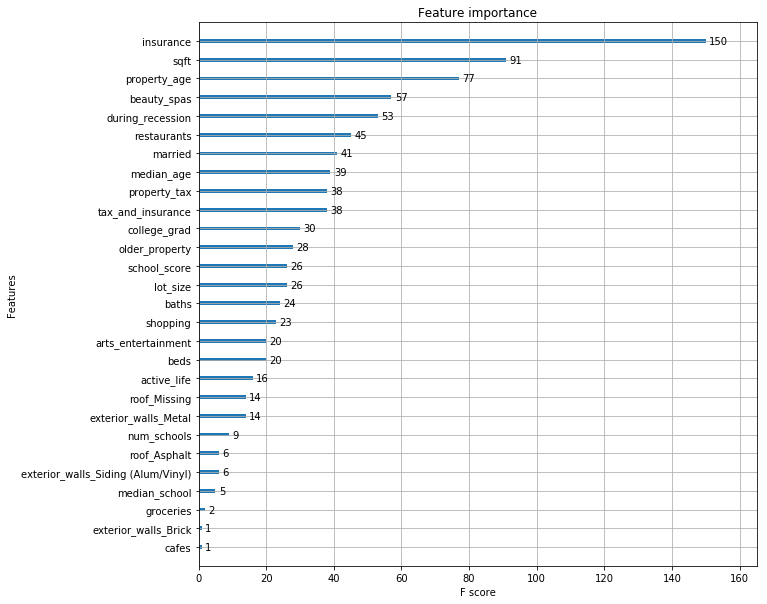

In [64]:
my_plot_importance(model, (10,10))

### Compare all models

![title](Images/Capture.jpg)
* From Above table RSE and MAE of Random Forest Regressor is lower then the all other model.
* Therfore Random Forest Regressor is best model.

# 7. Save the winning model to disk

In [82]:
win_model = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=4)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'Save/rfr_real_estate.pkl') 

['Save/rfr_real_estate.pkl']